<a href="https://colab.research.google.com/github/marble86625/113-2-Generative-AI-for-the-Humanities/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW6_程式練習 (III)

這是一個關於現代奧運會的歷史資料集，包含從1896年雅典到2016年里約的所有賽事。[資料來源](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

> **請注意**：直到1992年，夏季和冬季運動會是在同一年舉行的。之後它們就分開，冬季運動會在1994年開始，然後夏季運動會在1996年，再然後是冬季運動會在1998年，以此類推。分析這些數據時，人們常犯的一個錯誤是假設夏季和冬季運動會一直都是分開的。

### 內容
資料集 `athlete_events.csv` 包含271116個橫列和15個直欄。每個橫列對應一位運動員參加一個奧運賽事。這些直欄包括：

- ID - 每個運動員的唯一編號
- Name - 運動員的名字
- Sex - 男（M）或女（F）
- Age - 年齡（整數）
- Height - 身高（以厘米為單位）
- Weight - 體重（以千克為單位）
- Team - 隊伍名稱
- NOC - 國家奧林匹克委員會的3個字母代碼
- Games - 奧運年份和賽季
- Year - 奧運年份（整數）
- Season - 奧運賽季（夏季或冬季）
- City - 主辦城市
- Sport - 運動項目
- Event - 賽事
- Medal - 獲得的獎牌（金牌、銀牌、銅牌或NA）

## 題目一：依運動項目填補缺失值 (25%)


### 📄 題目描述：

本資料集中記錄了歷年奧運運動員的基本資訊，包括身高（`Height`）與體重（`Weight`）。由於有部分資料缺失，請你嘗試根據**相同運動項目（`Sport`）**的平均身高與體重，來填補這些缺失值。

---

### ✅ 任務要求：
  1. 讀取資料集，將資料集存放在 `oly_df` 中並列印出來。
  2. 針對資料中的 `Height` 和 `Weight` 欄位進行缺失值填補。
  3. 填補方式為：
   - 依據每個 `Sport` 的非缺失資料，分別計算 `Height` 與 `Weight` 的**平均值**。
   - 將該運動項目中缺失的 `Height` 和 `Weight` 欄位，使用對應的平均值進行填補。
  4. 如果某一個運動項目中，所有選手的 `Height` 或 `Weight` 值都是缺失的，請**略過此運動項目**，**不要嘗試填補**。
  5. 請輸出以下資訊：
   - 每個 `Sport` 對應的 `Height` 與 `Weight` 平均值。
   - 補值後，`Height` 欄位中仍為缺失值的資料筆數
   - 補值後，`Weight` 欄位中仍為缺失值的資料筆數

In [3]:
### 非台大學生請執行以下程式碼獲取資料集 ###

!gdown 1BzjcfGjxNl2VF_LBm8TxpVE6YykYZMhn

### 非台大學生請執行以上程式碼獲取資料集 ###

Downloading...
From: https://drive.google.com/uc?id=1BzjcfGjxNl2VF_LBm8TxpVE6YykYZMhn
To: /content/athlete_events.csv
100% 41.5M/41.5M [00:00<00:00, 86.8MB/s]


In [4]:
# 讀取資料集
import pandas as pd
oly_df = pd.read_csv('athlete_events.csv')

print(oly_df)

            ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1          

In [5]:
# 依照運動項目，計算平均值
sport_avg = oly_df.groupby('Sport')[['Height', 'Weight']].mean()

print(sport_avg)

                      Height     Weight
Sport                                  
Aeronautics              NaN        NaN
Alpine Skiing     173.489052  72.068110
Alpinism                 NaN        NaN
Archery           173.203085  70.011135
Art Competitions  174.644068  75.290909
...                      ...        ...
Tug-Of-War        182.480000  95.615385
Volleyball        186.994822  78.900214
Water Polo        184.834648  84.566446
Weightlifting     167.824801  78.726663
Wrestling         172.358586  75.495570

[66 rows x 2 columns]


In [8]:
# 找出缺值的格子，進行填補
def fill_missing(row):
  sport = row['Sport'] # 幫助我們在做迴圈時單筆檢視每個格子
  if sport in sport_avg.index: # 檢查該運動項目是否在 sport_avg(若該項目所有Height, Weight缺失，不進行填補)
    if pd.isna(row['Height']): #如果這位選手的 Height 是空值（缺資料），就執行下面的補值動作。
      row['Height'] = sport_avg.loc[sport, 'Height'] # 查某個運動的平均值，使用 .loc[] 把對應資料撈出來。
    if pd.isna(row['Weight']):
      row['Weight'] = sport_avg.loc[sport, 'Weight']
  return row

# 更新DataFrame，將新的DataFrame存於新的資料集oly_filled_df(等式左邊)
oly_filled_df = oly_df.apply(fill_missing, axis = 1)
# df.apply(func, axis=1)   # 對每一「列」使用某個函式func
# df.apply(func, axis=0)   # 對每一「欄」使用某個函式func


In [10]:
# 檢查新檔案中 height 和 weight 欄是否還有缺失值
missing = oly_filled_df[['Height', 'Weight']].isna().sum() #雙層[]是因為要顯示回傳為DataFrame格式，而不是Series

#顯示補值後，Height, Weight 欄位中仍為缺失值的資料筆數
print(missing)

Height     99
Weight    217
dtype: int64


## 題目二：統計各國獎牌數量（25%）

### 📄 題目描述：

本資料集中包含了運動員參加比賽的紀錄，其中 `Medal` 欄位記錄了選手是否獲得獎牌（金、銀、銅），`NOC` 欄位表示國家或地區的代碼（例如 USA、CHN、JPN 等）。

請你統計出**每個國家**獲得的金牌、銀牌、銅牌，以及總獎牌數，並依據總獎牌數進行排序（由高至低）。

---

### ✅ 任務要求：

1. 以 `NOC` 為單位，統計該國獲得的：
   - 金牌（`Medal == "Gold"`）
   - 銀牌（`Medal == "Silver"`）
   - 銅牌（`Medal == "Bronze"`）
2. 計算總獎牌數（上述三者加總）
3. 將結果依照總獎牌數 `Total` 欄位由高至低排序。
4. 輸出結果需包含以下欄位：
   - `NOC`
   - `Gold`
   - `Silver`
   - `Bronze`
   - `Total`

In [11]:
# 篩選出有獎牌的資料（排除 NaN）
medal_df = oly_df[oly_df["Medal"].notnull()]
print(medal_df)

            ID                                 Name Sex   Age  Height  Weight  \
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
37          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
38          15                 Arvo Ossian Aaltonen   M  30.0     NaN     NaN   
40          16             Juhamatti Tapio Aaltonen   M  28.0   184.0    85.0   
41          17              Paavo Johannes Aaltonen   M  28.0   175.0    64.0   
...        ...                                  ...  ..   ...     ...     ...   
271078  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
271080  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
271082  135554                         Bogusaw Zych   M  28.0   182.0    82.0   
271102  135563            Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
271103  135563            Olesya Nikolayevna Zykina   F  23.0   171.0    64.0   

                  Team  NOC

In [12]:
# 使用 pd.crosstab 交叉統計：每個 NOC 得到幾個金、銀、銅牌
medal_count = pd.crosstab(medal_df["NOC"], medal_df["Medal"])
print(medal_count)

Medal  Bronze  Gold  Silver
NOC                        
AFG         2     0       0
AHO         0     0       1
ALG         8     5       4
ANZ         5    20       4
ARG        91    91      92
..        ...   ...     ...
VIE         0     1       3
WIF         5     0       0
YUG        93   130     167
ZAM         1     0       1
ZIM         1    17       4

[149 rows x 3 columns]


In [13]:
# 重新命名欄位名稱為 Gold, Silver, Bronze（順序會顛倒）
medal_count = medal_count.rename(columns={
    "Gold": "Gold",
    "Silver": "Silver",
    "Bronze": "Bronze"
})

# 確保所有三種牌都有欄位（有些國家可能沒得過某種牌）
for col in ["Gold", "Silver", "Bronze"]:
    if col not in medal_count.columns:
        medal_count[col] = 0

In [14]:
# 計算總獎牌數
medal_count["Total"] = medal_count["Gold"] + medal_count["Silver"] + medal_count["Bronze"]

# 依照總獎牌數排序
medal_sorted = medal_count.sort_values(by="Total", ascending=False)

# 強制重新排列欄位順序，金、銀、銅牌
medal_count = medal_count[["Gold", "Silver", "Bronze"]]

# 重設索引，並把 NOC 從 index 變成欄位
medal_sorted = medal_sorted.reset_index()

# 顯示前幾名（你可以改成 medal_sorted.head(10) 看前 10 名）
print(medal_sorted)

Medal  NOC  Bronze  Gold  Silver  Total
0      USA    1358  2638    1641   5637
1      URS     689  1082     732   2503
2      GER     746   745     674   2165
3      GBR     651   678     739   2068
4      FRA     666   501     610   1777
..     ...     ...   ...     ...    ...
144    NEP       0     1       0      1
145    MRI       1     0       0      1
146    TOG       1     0       0      1
147    SUD       0     0       1      1
148    TGA       0     0       1      1

[149 rows x 5 columns]


## 題目三：找出參賽人數最多的運動項目（25%）

### ✅ 任務要求：

1. 資料預處理：
  - 移除重複的參賽者紀錄（提示：可使用 `ID`、`Year` 和 `Sport` 這三個欄位進行 `drop_duplicates()`）。

2. 資料切分：
  - 分別取出夏季奧運與冬季奧運的資料。

4. 分別計算：
  - 夏季奧運中，參賽人數最多的前 5 個運動項目
  - 冬季奧運中，參賽人數最多的前 5 個運動項目

5. 請印出這兩組熱門運動項目的名稱及對應人數

In [15]:
# 去除重複的參賽者紀錄
oly_df_unique = oly_df.drop_duplicates(subset = ['ID', 'Year', 'Sport'])

In [19]:
# 資料切分：取出夏季奧運與冬季奧運的資料。
summer_oly_df = oly_df_unique[oly_df_unique['Season'] == 'Summer']
winter_oly_df = oly_df_unique[oly_df_unique['Season'] == 'Winter']

print(summer_oly_df)
print(winter_oly_df)

            ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26           8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
271106  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Game

In [29]:
# 夏季奧運中，參賽人數最多的前 5 個運動項目
summer_top5 = summer_oly_df['Sport'].value_counts().head(5) #.value_counts()：統計某個欄位中每個唯一值出現的次數，也就是「分組次數統計」
print("夏季奧運參賽人數最多的前 5 個運動項目：")
print(summer_top5)

# 冬季奧運中，參賽人數最多的前 5 個運動項目
winter_top5 = winter_oly_df['Sport'].value_counts().head(5)
print("冬季奧運參賽人數最多的前 5 個運動項目：")
print(winter_top5)

夏季奧運參賽人數最多的前 5 個運動項目：
Sport
Athletics    30536
Swimming     11935
Rowing       10223
Cycling       7540
Shooting      7471
Name: count, dtype: int64
冬季奧運參賽人數最多的前 5 個運動項目：
Sport
Ice Hockey              5456
Alpine Skiing           4120
Cross Country Skiing    3731
Speed Skating           2544
Bobsleigh               2345
Name: count, dtype: int64


## 題目四：畫出熱門運動項目的參與變化圖（25%）

### ✅ 任務要求：

1. 承上題，將上述統計結果畫成兩張堆疊長條圖（stacked bar chart）：
  - 圖一：夏季奧運熱門運動項目變化圖。
  - 圖二：冬季奧運熱門運動項目變化圖。


2. 視覺化要求：
  - `x` 軸為 `Year`，`y` 軸為 `No. of People Participated in Sport`
  - 每個堆疊的顏色區塊代表一個熱門運動項目
  - 圖片大小為 `(15, 6)`
  - 請為每張圖加上適當的標題，如：
    - `"Top 5 Sports Participation - Summer Olympics"`
    - `"Top 5 Sports Participation - Winter Olympics"`
  - 圖中應包含圖例（Legend），標示每種運動所代表的顏色



<Figure size 1500x600 with 0 Axes>

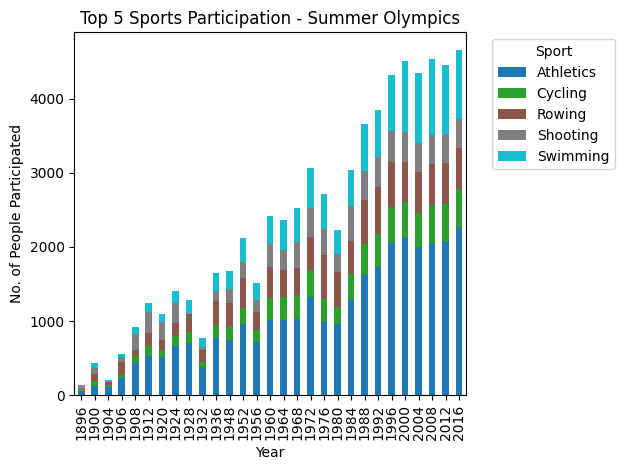

<Figure size 1500x600 with 0 Axes>

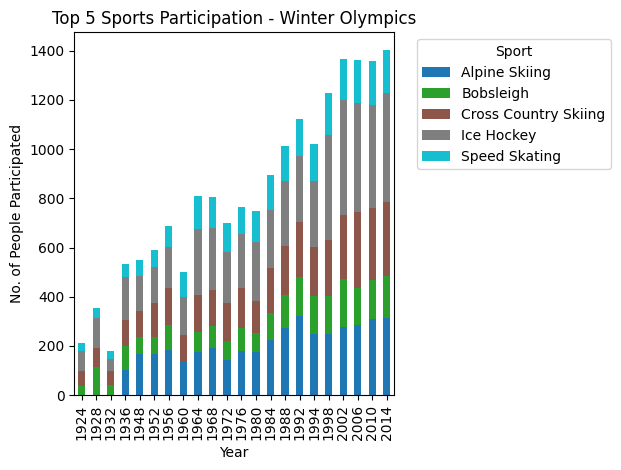

In [31]:
import matplotlib.pyplot as plt

# 取得 top5 的運動項目名稱
summer_top5_sports = summer_top5.index
winter_top5_sports = winter_top5.index

# 篩選這些運動
summer_top5_df = summer_oly_df[summer_oly_df['Sport'].isin(summer_top5_sports)]
winter_top5_df = winter_oly_df[winter_oly_df['Sport'].isin(winter_top5_sports)]

# 分組：Year vs Sport，計算每年每個運動的人數
summer_grouped = summer_top5_df.groupby(['Year', 'Sport']).size().unstack().fillna(0)
winter_grouped = winter_top5_df.groupby(['Year', 'Sport']).size().unstack().fillna(0)

# 畫夏季奧運圖
plt.figure(figsize=(15, 6))
summer_grouped.plot(kind='bar', stacked=True, colormap='tab10')
plt.title("Top 5 Sports Participation - Summer Olympics")
plt.xlabel("Year")
plt.ylabel("No. of People Participated")
plt.legend(title="Sport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 畫冬季奧運圖
plt.figure(figsize=(15, 6))
winter_grouped.plot(kind='bar', stacked=True, colormap='tab10')
plt.title("Top 5 Sports Participation - Winter Olympics")
plt.xlabel("Year")
plt.ylabel("No. of People Participated")
plt.legend(title="Sport", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()